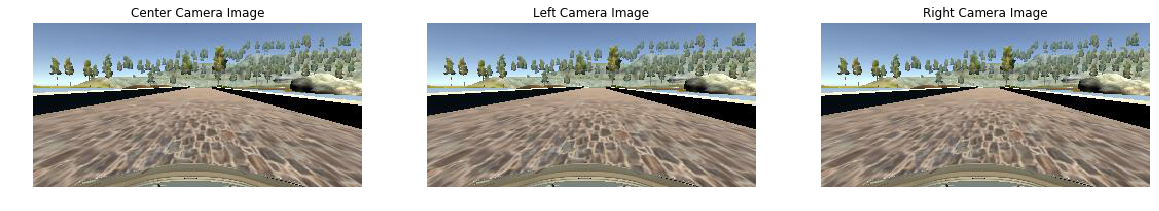

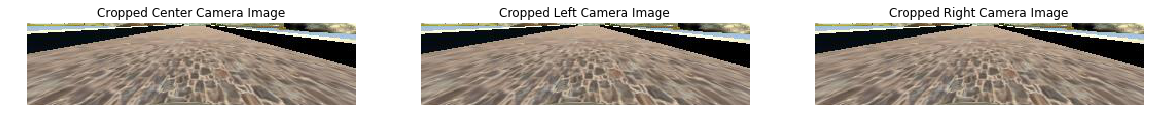

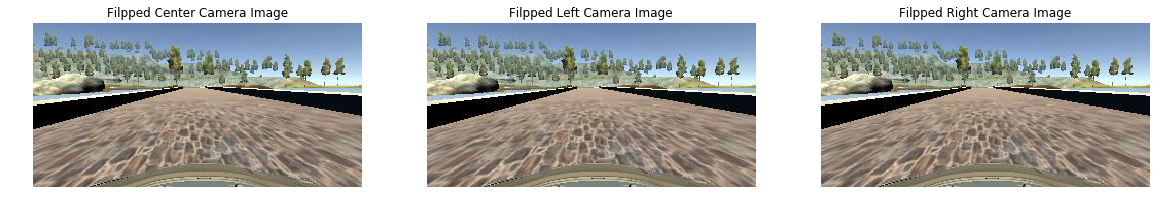

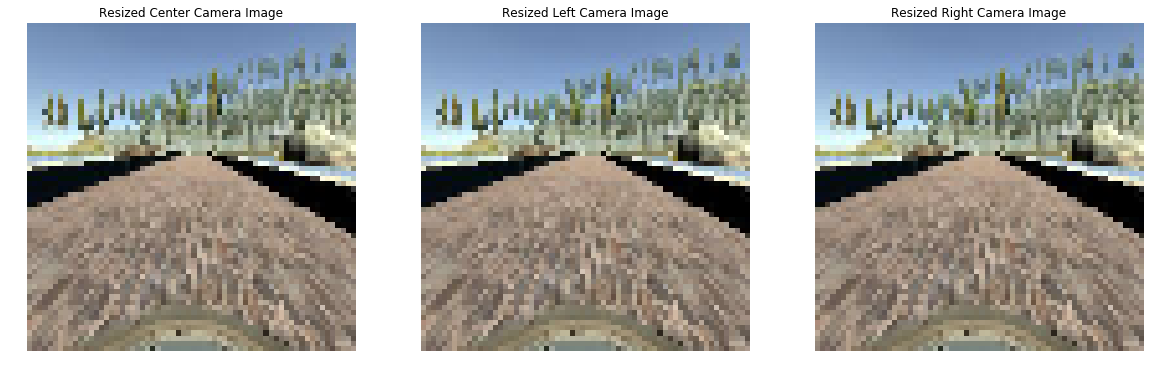

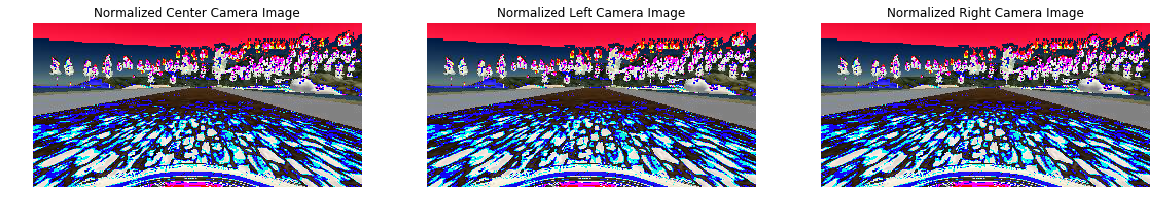

In [6]:
import csv
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense,Flatten
from keras.layers.convolutional import Convolution2D
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.contrib.slim.python.slim.nets.resnet_utils import subsample


"""Read csv file"""

lines =[]

with open('D:\\Eclipse-Workspace\\test\\driving_log.csv') as csvFile:
    reader = csv.reader(csvFile)
    next(reader,None)
    for line in reader:
        lines.append(line)

"""Data Preprocessing"""

def normalizeImage(image):
    return image/255.0-0.5

def resizeImage(image):
    return cv2.resize(image, (64, 64))

def cropImage(image):
    return image[60:140,:]

"""Data Augumentation"""

def flipImage(image):
    return cv2.flip(image,1)



def preprocess(lines):
    
    images=[]
    steeringAngles=[]
    correction = 0.2
    for line in lines:
        list_c=line[0].split("/")
        list_l=line[1].split("/")
        list_r=line[2].split("/")
                    
        image_c=cv2.imread("./IMG/"+list_c[-1])
        image_l=cv2.imread("./IMG/"+list_l[-1])
        image_r=cv2.imread("./IMG/"+list_r[-1])
                    
        image_c=normalizeImage(resizeImage(cropImage(image_c)))
        image_l=normalizeImage(resizeImage(cropImage(image_l)))
        image_r=normalizeImage(resizeImage(cropImage(image_r)))
                    
        steeringAngle_c=float(line[3])
        steeringAngle_l=float(line[3])+correction+0.05
        steeringAngle_r=float(line[3])-correction
                    
        flipped_c=flipImage(image_c)
        flipped_l=flipImage(image_l)
        flipped_r=flipImage(image_r)
    
        images.extend([image_c,image_l,image_r,flipped_c,flipped_l,flipped_r])
        steeringAngles.extend([steeringAngle_c,steeringAngle_l,steeringAngle_r,-steeringAngle_c,-steeringAngle_l,-steeringAngle_r])
    
    return images,steeringAngles


import random
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
def showImageGrid(images,titles):
    
    plt.figure(figsize=(20,10))
    for i in range(len(images)):
        plt.subplot(1,3,i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')

list_c=lines[120][0].split("/")
list_l=lines[120][0].split("/")
list_r=lines[120][0].split("/")

image_c_f=cv2.imread("./IMG/"+list_c[-1])
image_c_f=cv2.cvtColor(image_c_f, cv2.COLOR_BGR2RGB)
image_l_f=cv2.imread("./IMG/"+list_l[-1])
image_l_f=cv2.cvtColor(image_l_f, cv2.COLOR_BGR2RGB)
image_r_f=cv2.imread("./IMG/"+list_r[-1])
image_r_f=cv2.cvtColor(image_r_f, cv2.COLOR_BGR2RGB)

images=[image_c_f,image_l_f,image_r_f]
titles=["Center Camera Image","Left Camera Image","Right Camera Image"]
showImageGrid(images,titles)

image_c=cropImage(image_c_f)
image_l=cropImage(image_l_f)
image_r=cropImage(image_r_f)

images=[image_c,image_l,image_r]
titles=["Cropped Center Camera Image","Cropped Left Camera Image","Cropped Right Camera Image"]
showImageGrid(images,titles)

image_c=flipImage(image_c_f)
image_l=flipImage(image_l_f)
image_r=flipImage(image_r_f)

images=[image_c,image_l,image_r]
titles=["Filpped Center Camera Image","Filpped Left Camera Image","Filpped Right Camera Image"]
showImageGrid(images,titles)

image_c=resizeImage(image_c_f)
image_l=resizeImage(image_l_f)
image_r=resizeImage(image_r_f)

images=[image_c,image_l,image_r]
titles=["Resized Center Camera Image","Resized Left Camera Image","Resized Right Camera Image"]
showImageGrid(images,titles)

image_c=normalizeImage(image_c_f)
image_l=normalizeImage(image_l_f)
image_r=normalizeImage(image_r_f)

images=[image_c,image_l,image_r]
titles=["Normalized Center Camera Image","Normalized Left Camera Image","Normalized Right Camera Image"]
showImageGrid(images,titles)






In [7]:
def plotGraph(title,lables):
    train_labels, train_labels_count = np.unique(lables, return_counts = True)
    plt.bar(train_labels, train_labels_count)
    plt.title(title)
    plt.ylabel('Count')
    plt.xlabel('Class')
    plt.show()

train_samples, validation_samples = train_test_split(lines, test_size=0.2)

In [8]:
train_images,train_steeringAngles=preprocess(train_samples)
validation_images,validation_steeringAngles=preprocess(validation_samples)

In [ ]:
plotGraph("Data",train_steeringAngles)